## Linear Regression:

### What is regression?

* Regression is the process of finding the relation between one dependent variable (target) and one or more independent numerical variables (features).
* In regression, the target variable is of continuous type.

## Linear Regression example:

### 🧠 Understanding Regression

Regression is a supervised machine learning technique used to predict continuous numeric values. It models the relationship between a dependent variable (target) and one or more independent variables (features).​

### 📊 Dataset Overview

We'll use a dataset that records daily temperatures and corresponding ice cream sales. This simple dataset helps illustrate the principles of regression modeling.

### 🛠️ Loading and Exploring the Data

#### Setup for azure portal jupyter lab:

In [ ]:
# import sys
# print(sys.executable)

##### select the correct python environment as per the above given output

In [ ]:

# !/anaconda/envs/azureml_py38/bin/python -m pip install ipykernel
# !/anaconda/envs/azureml_py38/bin/python -m ipykernel install --user --name=azureml_py38



##### After above ipykernel is installed, change the kernel in jupyter lab from the top right corner

In [ ]:
# !pip install numpy
# !pip install pandas
# !pip install matplotlib
# !pip install seaborn
# !pip install scikit-learn

   Temperature  Ice_Cream_Sales
0           51                1
1           52                0
2           67               14
3           65               14
4           70               23
       Temperature  Ice_Cream_Sales
count    12.000000        12.000000
mean     69.666667        19.583333
std      10.048368        10.791060
min      51.000000         0.000000
25%      66.500000        14.000000
50%      71.000000        22.500000
75%      75.750000        26.000000
max      83.000000        36.000000


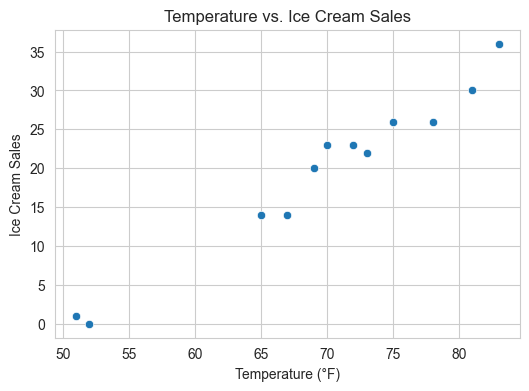

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load the dataset
data = pd.read_csv('ice_cream_sales.csv')

# Display the first few rows
print(data.head())

# Summary statistics
print(data.describe())

# Scatter plot of Temperature vs. Ice Cream Sales
plt.figure(figsize=(6,4))
sns.scatterplot(x='Temperature', y='Ice_Cream_Sales', data=data)
plt.title('Temperature vs. Ice Cream Sales')
plt.xlabel('Temperature (°F)')
plt.ylabel('Ice Cream Sales')
plt.show()

### 🧪 Preparing the Data

In [15]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = data[['Temperature']]
y = data['Ice_Cream_Sales']

# Split the dataset into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### 🤖 Training the Regression Model

In [16]:
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Display the model parameters
print(f'Intercept: {model.intercept_}')
print(f'Coefficient: {model.coef_[0]}')

Intercept: -61.87519854776491
Coefficient: 1.1772180621738142


### 📈 Visualizing the Regression Line

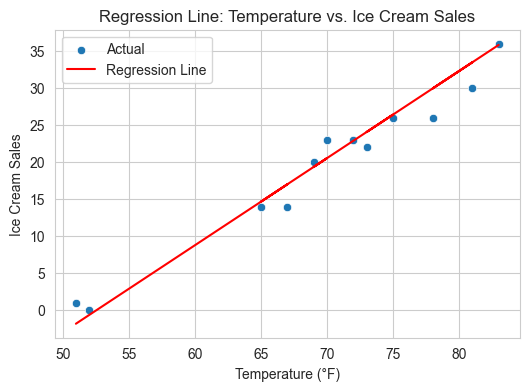

In [17]:
# Plotting the regression line over the scatter plot
plt.figure(figsize=(6,4))
sns.scatterplot(x='Temperature', y='Ice_Cream_Sales', data=data, label='Actual')
plt.plot(X, model.predict(X), color='red', label='Regression Line')
plt.title('Regression Line: Temperature vs. Ice Cream Sales')
plt.xlabel('Temperature (°F)')
plt.ylabel('Ice Cream Sales')
plt.legend()
plt.show()

### 📊 Evaluating the Model

In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Display the metrics
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R-squared (R²): {r2:.2f}')

Mean Absolute Error (MAE): 3.08
Mean Squared Error (MSE): 10.00
Root Mean Squared Error (RMSE): 3.16
R-squared (R²): 0.92


### 📈 Visualizing the predictions

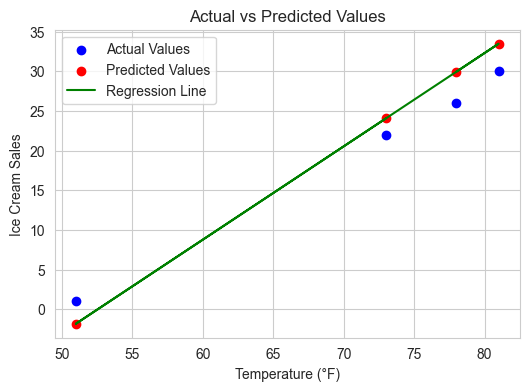

In [24]:
### plotting the graph of x_test vs y_test and y_pred values with regression line showing the errors:
plt.figure(figsize=(6,4))
plt.scatter(X_test, y_test, color='blue', label='Actual Values')
plt.scatter(X_test, y_pred, color='red', label='Predicted Values')
plt.plot(X_test, y_pred, color='green', label='Regression Line')
plt.title('Actual vs Predicted Values')
plt.xlabel('Temperature (°F)')
plt.ylabel('Ice Cream Sales')
plt.legend()
plt.show()

### 🧠 Interpreting the Results

- **MAE (Mean Absolute Error):** Average absolute difference between predicted and actual values.  
- **MSE (Mean Squared Error):** Average squared difference between predicted and actual values.  
- **RMSE (Root Mean Squared Error):** Square root of MSE, providing error in the same units as the target variable.  
- **R² (R-squared):** Proportion of variance in the dependent variable predictable from the independent variable(s).  

A higher R² value (closer to 1) indicates a better fit of the model to the data.


### 🔍 Residual Analysis

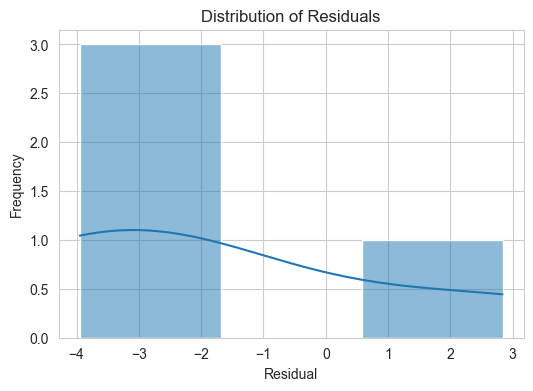

In [21]:
# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(6,4))
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.show()

A normal distribution of residuals centered around zero suggests that the model's errors are random and the model is appropriate for the data.

### 🧪 Making Predictions


In [20]:
# Predict ice cream sales for a new temperature value
new_temperature = pd.DataFrame({'Temperature': [77]})
predicted_sales = model.predict(new_temperature)
print(f'Predicted ice cream sales at 77°F: {predicted_sales[0]:.2f}')

Predicted ice cream sales at 77°F: 28.77
